In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\Cafe Bazaar\bda_task_data.csv')

In [3]:
df.head()

,game_number,user_id,amount,date,sku_id,category
0,game0,0,49000,2020-01-11,sku0,category0
1,game0,1,49000,2020-01-07,sku0,category0
2,game0,2,49000,2020-01-12,sku0,category0
3,game0,3,49000,2020-01-11,sku0,category0
4,game0,4,49000,2020-01-03,sku0,category0


In [4]:
df.isnull().values.any()

False

In [5]:
df.dtypes

game_number    object
user_id         int64
amount          int64
date           object
sku_id         object
category       object
dtype: object

In [6]:
df['user_id']=df['user_id'].astype(object)

In [7]:
print(df.select_dtypes('object').nunique())
df.select_dtypes(exclude='object').describe()

game_number       100
user_id        371091
date              366
sku_id           1875
category           10
dtype: int64


,amount
count,1.279981e+06
mean,2.321043e+05
std,5.499576e+05
min,0.000000e+00
25%,4.900000e+04
50%,1.000000e+05
75%,2.994000e+05
max,2.845100e+07


## SKU Analysis

In [8]:
sku=df.groupby('sku_id')['amount'].aggregate(['min', np.median, np.mean, max]).sort_values(by='mean')
sku.tail()

,min,median,mean,max
sku_id,,,,
sku577,9790000,13000000,1.164426e+07,13000000
sku1331,8799120,13498650,1.326367e+07,13498650
sku1702,16648000,16648000,1.664800e+07,16648000
sku1706,28451000,28451000,2.845100e+07,28451000
sku1707,28451000,28451000,2.845100e+07,28451000


In [9]:
sku.shape

(1875, 4)

In [10]:
sku['diff']=sku['max']-sku['min']

In [11]:
sku_diff_0=sku.loc[sku["diff"]==0]

In [12]:
sku_diff_0.shape

(1371, 5)

In [13]:
sku['diff'].describe()

count    1.875000e+03
mean     1.453902e+05
std      7.234885e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+04
max      1.200000e+07
Name: diff, dtype: float64

## Number of Games in each group

In [17]:
df.groupby('category')['game_number'].nunique()

category
category0    10
category1    10
category2    10
category3    10
category4    10
category5    10
category6    10
category7    10
category8    10
category9    10
Name: game_number, dtype: int64

## amount and number of users

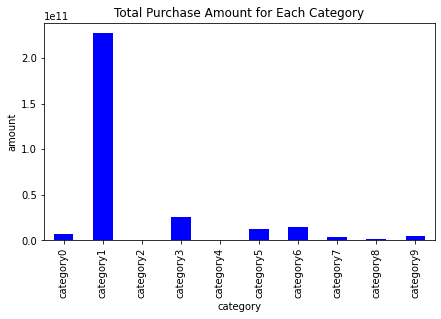

In [18]:
amnt_sum=df.groupby('category')['amount'].sum()
#amnt_sum.sort_values(ascending=False)

plt.figure(figsize=(7,4))
amnt_sum.plot.bar(grid=True ,color='b')
plt.title('Total Purchase Amount for Each Category')
plt.xlabel('category')
plt.ylabel('amount')
plt.grid()
plt.savefig('amnt_sum.png')
plt.show()

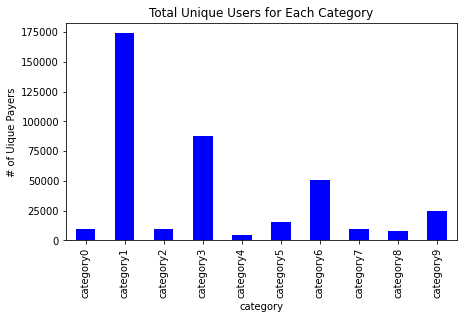

In [19]:
usr_cnt=df.groupby('category')['user_id'].nunique()
#usr_cnt.sort_values(ascending=False)

plt.figure(figsize=(7,4))
usr_cnt.plot.bar(grid=True ,color='b')
plt.title('Total Unique Users for Each Category')
plt.xlabel('category')
plt.ylabel('# of Uique Payers')
plt.grid()
plt.savefig('usr_cnt.png')
plt.show()

## Amount per User and Transactions

In [20]:
amnt_per_user=pd.merge(amnt_sum,usr_cnt,on='category')
amnt_per_user=amnt_per_user.rename(columns={'user_id':'user_cnt'})
amnt_per_user['average_amnt_per_user']=amnt_per_user['amount']/amnt_per_user['user_cnt']
amnt_per_user.sort_values(by='average_amnt_per_user',ascending=False)

,amount,user_cnt,average_amnt_per_user
category,,,
category1,227072991265,173927,1.305565e+06
category5,12120441920,15686,7.726917e+05
category0,6532860392,9639,6.777529e+05
category7,3214821425,9293,3.459401e+05
category3,25931530960,87533,2.962486e+05
category6,15077593510,50957,2.958886e+05
category8,1353718620,7512,1.802075e+05
category9,4336344503,24381,1.778575e+05
category4,512321733,4915,1.042364e+05


<Figure size 504x288 with 0 Axes>

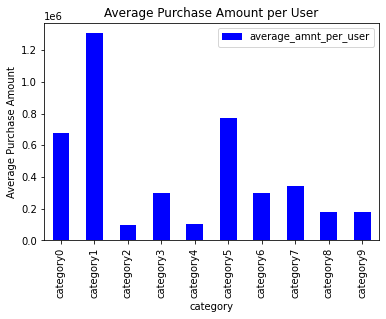

In [21]:
amnt_per_user2=amnt_per_user.drop(['amount','user_cnt'],axis=1)
plt.figure(figsize=(7,4))
amnt_per_user2.plot.bar(grid=True ,color='b')
plt.title('Average Purchase Amount per User')
plt.xlabel('category')
plt.ylabel('Average Purchase Amount')
plt.grid()
plt.savefig('amnt_per_user.png')
plt.show()

<Figure size 504x288 with 0 Axes>

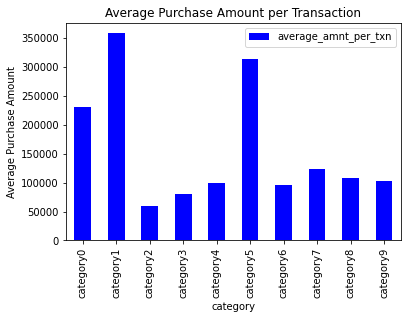

In [22]:
txn_cnt=df.groupby('category')['user_id'].count()

amnt_per_txn=pd.merge(amnt_sum,txn_cnt,on='category')
amnt_per_txn=amnt_per_txn.rename(columns={'user_id':'txn_cnt'})
amnt_per_txn['average_amnt_per_txn']=amnt_per_txn['amount']/amnt_per_txn['txn_cnt']

amnt_per_txn2=amnt_per_txn.drop(['amount','txn_cnt'],axis=1)
plt.figure(figsize=(7,4))
amnt_per_txn2.plot.bar(grid=True ,color='b')
plt.title('Average Purchase Amount per Transaction')
plt.xlabel('category')
plt.ylabel('Average Purchase Amount')
plt.grid()
plt.savefig('amnt_per_txn.png')
plt.show()

In [23]:
amnt_per_txn.sort_values(by='average_amnt_per_txn',ascending=False)

,amount,txn_cnt,average_amnt_per_txn
category,,,
category1,227072991265,634076,358116.363441
category5,12120441920,38696,313222.088071
category0,6532860392,28303,230818.654984
category7,3214821425,26106,123144.925496
category8,1353718620,12599,107446.513215
category9,4336344503,42075,103062.257944
category4,512321733,5179,98922.906546
category6,15077593510,156455,96370.160813
category3,25931530960,320728,80852.095732


## Volatility

In [24]:
amnt_std=df.groupby('category')['amount'].std()
amnt_std.sort_values(ascending=False)

category
category5    841213.530784
category1    706215.039386
category0    382687.573309
category2    370145.377779
category7    191032.160300
category6    186248.066990
category8    172631.560949
category3    151917.360777
category9    129417.921100
category4     83306.123575
Name: amount, dtype: float64

<Figure size 1440x960 with 0 Axes>

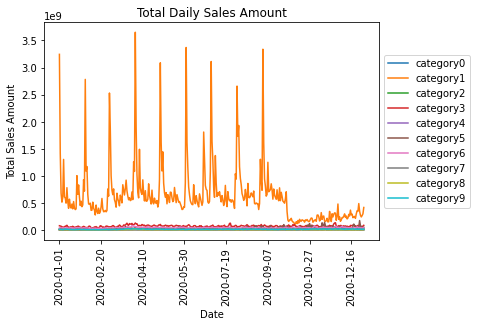

In [25]:
series1=pd.pivot_table(df, values='amount', columns='category', index='date', aggfunc='sum')

plt.figure(figsize=(18, 12), dpi=80)
series1.plot()
plt.title('Total Daily Sales Amount')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('sales_D.png')
plt.show()


<Figure size 1440x960 with 0 Axes>

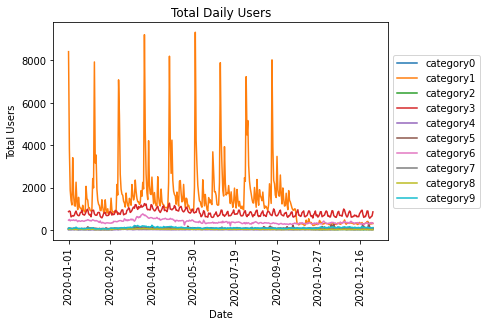

In [26]:
series2=pd.pivot_table(df, values='user_id', columns='category', index='date', aggfunc='nunique')

plt.figure(figsize=(18, 12), dpi=80)
series2.plot()
plt.title('Total Daily Users')
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('users_D.png')
plt.show()


<Figure size 1440x960 with 0 Axes>

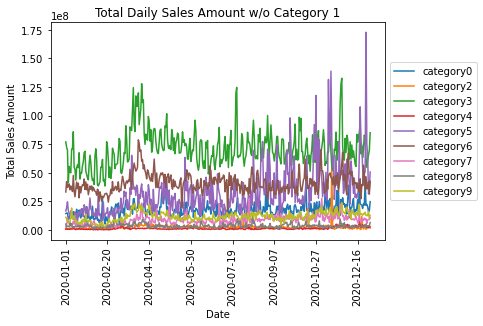

In [29]:
nocat1=df.loc[df['category']!='category1']
series3=pd.pivot_table(nocat1, values='amount', columns='category', index='date', aggfunc='sum')

plt.figure(figsize=(18, 12), dpi=80)
series3.plot()
plt.title('Total Daily Sales Amount w/o Category 1')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


<Figure size 1440x960 with 0 Axes>

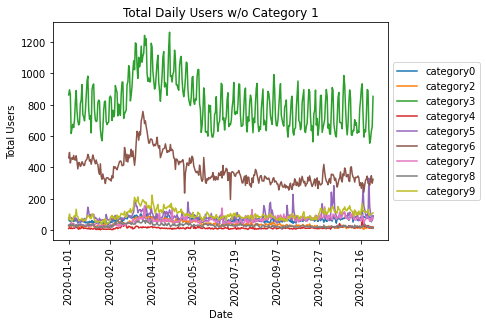

In [31]:
series4=pd.pivot_table(nocat1, values='user_id', columns='category', index='date', aggfunc='nunique')

plt.figure(figsize=(18, 12), dpi=80)
series4.plot()
plt.title('Total Daily Users w/o Category 1')
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## Number of Days with Transactions

In [32]:
date_cnt=df.groupby('category')['date'].count()
date_cnt.sort_values(ascending=False)

category
category1    634076
category3    320728
category6    156455
category9     42075
category5     38696
category0     28303
category7     26106
category2     15764
category8     12599
category4      5179
Name: date, dtype: int64

In [33]:
date_unq=df.groupby('category')['date'].nunique()
date_unq.sort_values(ascending=False)

category
category0    366
category1    366
category2    366
category3    366
category4    366
category5    366
category6    366
category7    366
category8    366
category9    366
Name: date, dtype: int64

## Monthly Active/ Payer Users

In [34]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [35]:
MAU_data=df.loc[df['amount']!=0]
MAU_data2=MAU_data.groupby('category')['user_id'].nunique()
usr_MAU=pd.merge(MAU_data2,usr_cnt,on='category')
usr_MAU=usr_MAU.rename(columns={'user_id_x':'payer_user_cnt', 'user_id_y':'user_cnt'})
usr_MAU['0_payer_user_cnt']=usr_MAU['user_cnt']-usr_MAU['payer_user_cnt']
usr_MAU.sort_values(by='0_payer_user_cnt' ,ascending=False)

,payer_user_cnt,user_cnt,0_payer_user_cnt
category,,,
category5,14867,15686,819
category4,4600,4915,315
category2,9277,9524,247
category3,87468,87533,65
category9,24323,24381,58
category0,9599,9639,40
category6,50945,50957,12
category8,7503,7512,9
category1,173922,173927,5


In [36]:
print(MAU_data.shape)
print(df.shape)

(1276856, 7)
(1279981, 7)


<Figure size 1440x960 with 0 Axes>

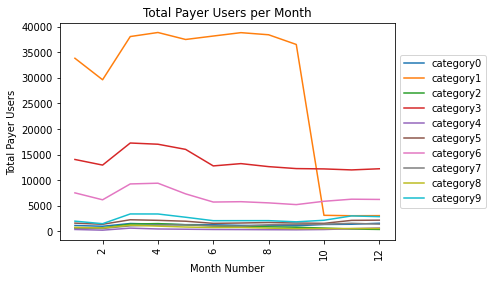

In [37]:
MAU=pd.pivot_table(MAU_data, values='user_id', columns='category', index='month', aggfunc='nunique')
plt.figure(figsize=(18, 12), dpi=80)
MAU.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total Payer Users per Month')
plt.xlabel('Month Number')
plt.ylabel('Total Payer Users')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('P_users_M.png')
plt.show()


## 0 Amount Tansactions per Category

<Figure size 1440x960 with 0 Axes>

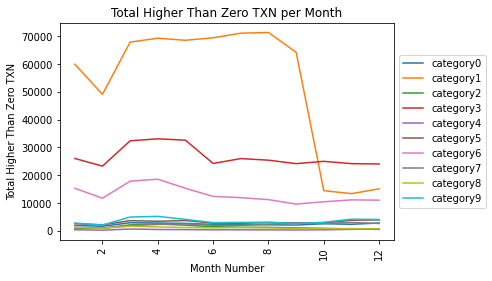

In [38]:
non0_txn=pd.pivot_table(MAU_data, values='user_id', columns='category', index='month', aggfunc='count')
plt.figure(figsize=(18, 12), dpi=80)
non0_txn.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Total Higher Than Zero TXN per Month')
plt.xlabel('Month Number')
plt.ylabel('Total Higher Than Zero TXN')
plt.xticks(rotation=90)
plt.savefig('N0_txn.png')
plt.show()

## Clusterting the Transactions

In [39]:
from sklearn.cluster import KMeans

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [41]:
clus_df=df.drop('user_id',axis=1)

In [42]:
col_names=['game_number','amount','date','sku_id','category']
features=clus_df[col_names]
ct = ColumnTransformer([
        ('somename', StandardScaler(), ['amount'])
    ], remainder='passthrough')

X=ct.fit_transform(features)

In [43]:
def catcode(df, col): 
    df[col + "_n"] = df[col].astype("category").cat.codes
    df = df.drop(col, axis=1, inplace=True)
     
_ = [catcode(clus_df, col) for col in list(clus_df.dtypes[clus_df.dtypes == object].index)]
print(clus_df.select_dtypes(exclude="object").nunique())
clus_df.describe()

amount            607
month              12
game_number_n     100
date_n            366
sku_id_n         1875
category_n         10
dtype: int64


,amount,month,game_number_n,date_n,sku_id_n,category_n
count,1.279981e+06,1.279981e+06,1.279981e+06,1.279981e+06,1.279981e+06,1.279981e+06
mean,2.321043e+05,5.926011e+00,5.783769e+01,1.631005e+02,9.266552e+02,2.689824e+00
std,5.499576e+05,3.160821e+00,2.823082e+01,9.709991e+01,6.233790e+02,2.253327e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.900000e+04,3.000000e+00,4.300000e+01,8.600000e+01,2.630000e+02,1.000000e+00
50%,1.000000e+05,6.000000e+00,6.600000e+01,1.550000e+02,1.054000e+03,1.000000e+00
75%,2.994000e+05,8.000000e+00,8.400000e+01,2.390000e+02,1.455000e+03,3.000000e+00
max,2.845100e+07,1.200000e+01,9.900000e+01,3.650000e+02,1.874000e+03,9.000000e+00


In [44]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(clus_df)
labels = k_means.labels_
print(labels)

[0 0 0 ... 3 3 3]


In [45]:
df_KM=df.copy()
df_KM['clus_KM'] = labels
df_KM.tail(5)

,game_number,user_id,amount,date,sku_id,category,month,clus_KM
1279976,game85,370471,599400,2020-09-23,sku1378,category1,9,3
1279977,game85,351380,599400,2020-09-23,sku1378,category1,9,3
1279978,game85,366211,599400,2020-09-23,sku1378,category1,9,3
1279979,game85,191260,599400,2020-09-23,sku1378,category1,9,3
1279980,game85,207493,599400,2020-09-23,sku1378,category1,9,3


In [48]:
df_KM.groupby('clus_KM').aggregate({'amount': ['min', np.mean,'max'],
                             'user_id': ['count','nunique'],
                                'category':'nunique',
                                'sku_id':'nunique'})

amount                         user_id         category  sku_id
             min          mean       max   count nunique  nunique nunique
clus_KM                                                                  
0              0  7.123504e+04    213000  824266  252078       10    1235
1        3750000  5.689743e+06   7500000    4108    1342        6      32
2         898081  1.426850e+06   3500000   38391   15438        9     241
3         219000  3.558635e+05    891000  412062  169904       10     535
4        8799120  1.177035e+07  28451000    1154     192        4       9

In [51]:
clus_cat=pd.pivot_table(df_KM,index='category',columns='clus_KM',values='user_id',aggfunc='count')
clus_cat.fillna(0)

clus_KM,0,1,2,3,4
category,,,,,
category0,18877.0,55.0,1151.0,8213.0,7.0
category1,229807.0,3761.0,29118.0,370333.0,1057.0
category2,15486.0,2.0,85.0,188.0,3.0
category3,306015.0,58.0,2416.0,12239.0,0.0
category4,4922.0,0.0,0.0,257.0,0.0
category5,29469.0,231.0,2567.0,6342.0,87.0
category6,147259.0,0.0,2182.0,7014.0,0.0
category7,23564.0,0.0,466.0,2076.0,0.0
category8,11274.0,1.0,277.0,1047.0,0.0


In [50]:
df_KM.groupby('clus_KM')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
clus_KM,,,,,,,,
0,824266.0,7.123504e+04,5.169108e+04,0.0,35000.0,55000.0,100000.0,213000.0
1,4108.0,5.689743e+06,6.875126e+05,3750000.0,5500000.0,5999400.0,5999400.0,7500000.0
2,38391.0,1.426850e+06,6.323245e+05,898081.0,1100000.0,1199400.0,1300000.0,3500000.0
3,412062.0,3.558635e+05,1.170664e+05,219000.0,299400.0,299400.0,299400.0,891000.0
4,1154.0,1.177035e+07,1.756662e+06,8799120.0,9790000.0,13000000.0,13000000.0,28451000.0


## Retention Rate

In [52]:
launch_date=df.groupby('game_number')['date'].min()

In [53]:
df3 = pd.merge(df, launch_date, on ='game_number',  how ='left')

In [54]:
df3=df3.rename(columns={'date_x':'ref_date', 'date_y':'launch_date'})
df3.head()

,game_number,user_id,amount,ref_date,sku_id,category,month,launch_date
0,game0,0,49000,2020-01-11,sku0,category0,1,2020-01-01
1,game0,1,49000,2020-01-07,sku0,category0,1,2020-01-01
2,game0,2,49000,2020-01-12,sku0,category0,1,2020-01-01
3,game0,3,49000,2020-01-11,sku0,category0,1,2020-01-01
4,game0,4,49000,2020-01-03,sku0,category0,1,2020-01-01


In [55]:
signup_date=df.groupby('user_id')['date'].min()

In [56]:
df4=pd.merge(df3, signup_date, on = 'user_id', how= 'left')
df4=df4.rename(columns={'date':'signup_date'})
df4.head()

,game_number,user_id,amount,ref_date,sku_id,category,month,launch_date,signup_date
0,game0,0,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11
1,game0,1,49000,2020-01-07,sku0,category0,1,2020-01-01,2020-01-07
2,game0,2,49000,2020-01-12,sku0,category0,1,2020-01-01,2020-01-12
3,game0,3,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11
4,game0,4,49000,2020-01-03,sku0,category0,1,2020-01-01,2020-01-03


<Figure size 1440x960 with 0 Axes>

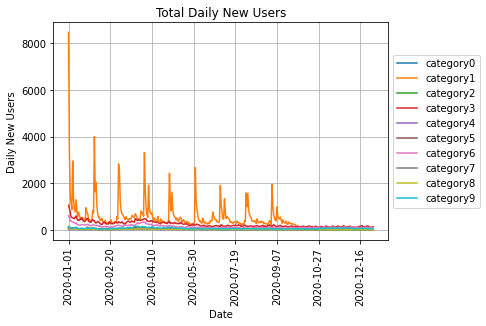

In [57]:
daily_new_users=pd.pivot_table(df4,index='signup_date',columns='category',values='user_id',aggfunc='nunique')
plt.figure(figsize=(18, 12), dpi=80)
daily_new_users.plot()
plt.title('Total Daily New Users')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily New Users')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


<Figure size 1440x960 with 0 Axes>

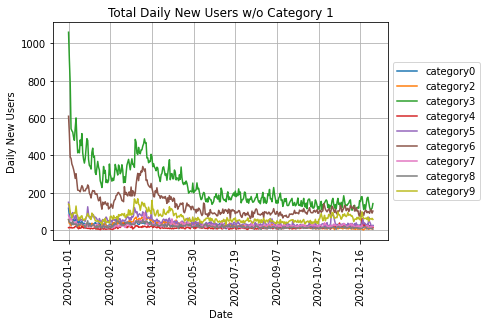

In [58]:
df4_nocat1=df4.loc[df4['category']!='category1']
daily_new_users_nocat1=pd.pivot_table(df4_nocat1,index='signup_date',columns='category',values='user_id',aggfunc='nunique')
plt.figure(figsize=(18, 12), dpi=80)
daily_new_users_nocat1.plot()
plt.title('Total Daily New Users w/o Category 1')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Daily New Users')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [59]:
from datetime import datetime
import seaborn as sns

In [60]:
df4.signup_date = pd.to_datetime(df4.signup_date, format='%Y/%m/%d')
df4.ref_date = pd.to_datetime(df4.ref_date, format='%Y/%m/%d')
df4.launch_date = pd.to_datetime(df4.launch_date, format='%Y/%m/%d')

df4['seniority'] = (df4['ref_date'] - df4['signup_date']).dt.days + 1

df4.head()

,game_number,user_id,amount,ref_date,sku_id,category,month,launch_date,signup_date,seniority
0,game0,0,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1
1,game0,1,49000,2020-01-07,sku0,category0,1,2020-01-01,2020-01-07,1
2,game0,2,49000,2020-01-12,sku0,category0,1,2020-01-01,2020-01-12,1
3,game0,3,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1
4,game0,4,49000,2020-01-03,sku0,category0,1,2020-01-01,2020-01-03,1


In [61]:
group = df4.groupby(['signup_date', 'seniority'])
cohort_data = group['user_id'].count()
cohort_data = cohort_data.reset_index()
cohort_data

,signup_date,seniority,user_id
0,2020-01-01,1,11644
1,2020-01-01,2,842
2,2020-01-01,3,494
3,2020-01-01,4,339
4,2020-01-01,5,404
...,...,...,...
65598,2020-12-29,2,19
65599,2020-12-29,3,17
65600,2020-12-30,1,406
65601,2020-12-30,2,20


In [62]:
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='user_id')
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
signup_date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,11644.0,842.0,494.0,339.0,404.0,446.0,376.0,364.0,364.0,871.0,...,43.0,80.0,79.0,72.0,65.0,68.0,84.0,43.0,76.0,59.0
2020-01-02,5404.0,274.0,283.0,211.0,243.0,190.0,169.0,195.0,364.0,214.0,...,32.0,58.0,62.0,33.0,29.0,40.0,37.0,42.0,41.0,NaN
2020-01-03,3062.0,136.0,136.0,120.0,114.0,120.0,126.0,150.0,105.0,106.0,...,26.0,23.0,24.0,16.0,14.0,13.0,22.0,15.0,NaN,NaN
2020-01-04,2372.0,129.0,154.0,104.0,80.0,90.0,144.0,119.0,84.0,98.0,...,22.0,7.0,7.0,10.0,14.0,13.0,8.0,NaN,NaN,NaN
2020-01-05,2012.0,149.0,98.0,97.0,90.0,126.0,79.0,83.0,84.0,79.0,...,13.0,5.0,7.0,13.0,14.0,11.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,425.0,22.0,11.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,450.0,32.0,12.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,427.0,19.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Weekly Retention Rate

In [65]:
df4.head()

,game_number,user_id,amount,ref_date,sku_id,category,month,launch_date,signup_date,seniority
0,game0,0,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1
1,game0,1,49000,2020-01-07,sku0,category0,1,2020-01-01,2020-01-07,1
2,game0,2,49000,2020-01-12,sku0,category0,1,2020-01-01,2020-01-12,1
3,game0,3,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1
4,game0,4,49000,2020-01-03,sku0,category0,1,2020-01-01,2020-01-03,1


In [66]:
df4_week=df4.copy()
df4_week['ref_week']=df4_week['ref_date'].dt.isocalendar().week
df4_week['launch_week']=df4_week['launch_date'].dt.isocalendar().week
df4_week['signup_week']=df4_week['signup_date'].dt.isocalendar().week
df4_week.drop(labels=['ref_date','launch_date','signup_date','seniority'],axis=1)
df4_week['seniority'] = (df4_week['ref_week'] - df4_week['signup_week']) + 1

In [67]:
df4_week.head()

,game_number,user_id,amount,ref_date,sku_id,category,month,launch_date,signup_date,seniority,ref_week,launch_week,signup_week
0,game0,0,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1,2,1,2
1,game0,1,49000,2020-01-07,sku0,category0,1,2020-01-01,2020-01-07,1,2,1,2
2,game0,2,49000,2020-01-12,sku0,category0,1,2020-01-01,2020-01-12,1,2,1,2
3,game0,3,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1,2,1,2
4,game0,4,49000,2020-01-03,sku0,category0,1,2020-01-01,2020-01-03,1,1,1,1


In [68]:
group_week = df4_week.groupby(['signup_week', 'seniority'])
cohort_week = group_week['user_id'].count()
cohort_week = cohort_week.reset_index()
cohort_week

,signup_week,seniority,user_id
0,1,1,27742
1,1,2,7015
2,1,3,5960
3,1,4,5548
4,1,5,9375
...,...,...,...
1426,51,2,713
1427,51,3,288
1428,52,1,3716
1429,52,2,361


In [69]:
cohort_counts_week = cohort_week.pivot(index='signup_week', columns='seniority', values='user_id')
base = cohort_counts_week[1]
retention_week = cohort_counts_week.divide(base, axis=0).round(3)
#cohort_counts_week

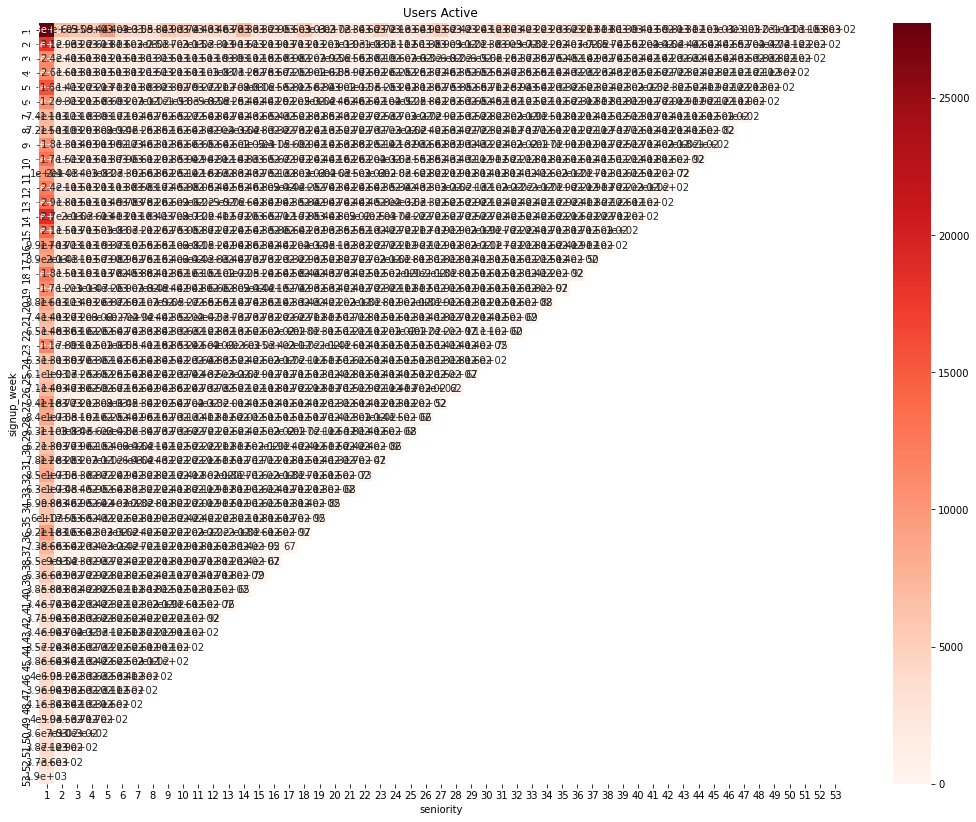

In [70]:
plt.figure(figsize=(18,14))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts_week, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts_week.index)
fig=ax.get_figure()

#plt.show()

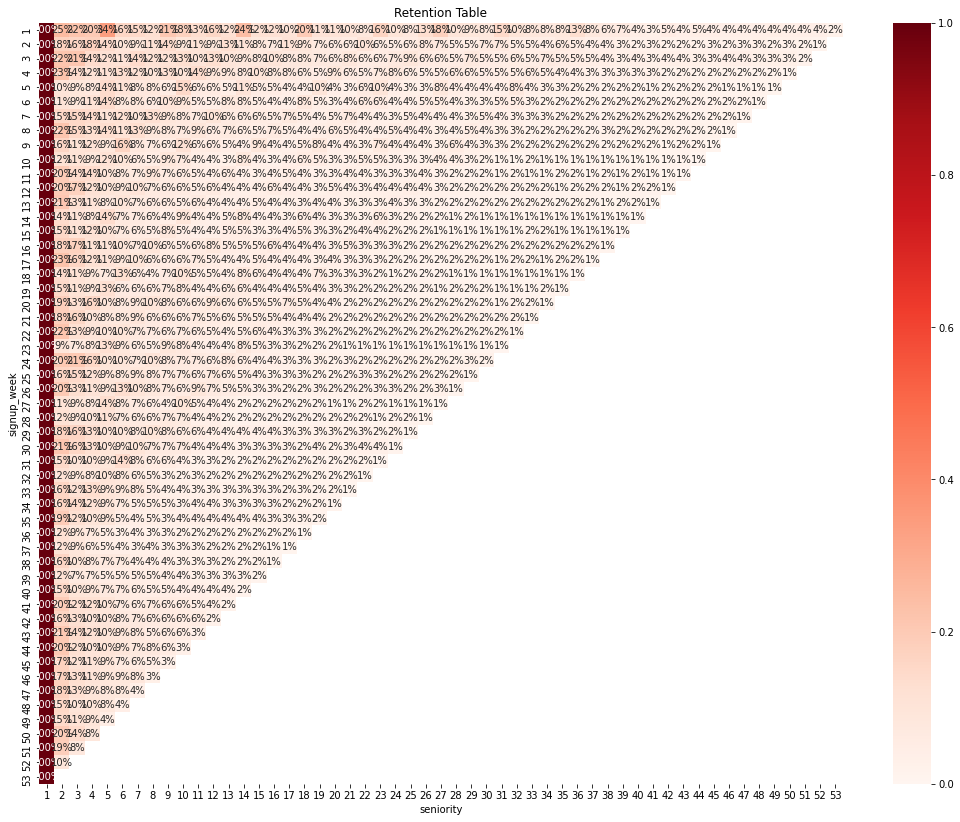

In [71]:
plt.figure(figsize=(18,14))
plt.title('Retention Table')
ax = sns.heatmap(data=retention_week, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_week.index)
fig=ax.get_figure()

plt.show()

### Monthly Retention

In [72]:
df4_m=df4.copy()
pd.DatetimeIndex(df['date']).month
df4_m['ref_m']=pd.DatetimeIndex(df4_m['ref_date']).month
df4_m['launch_m']=pd.DatetimeIndex(df4_m['launch_date']).month
df4_m['signup_m']=pd.DatetimeIndex(df4_m['signup_date']).month
df4_m.drop(labels=['ref_date','launch_date','signup_date','seniority'],axis=1)
df4_m['seniority'] = (df4_m['ref_m'] - df4_m['signup_m']) + 1
df4_m.head()

,game_number,user_id,amount,ref_date,sku_id,category,month,launch_date,signup_date,seniority,ref_m,launch_m,signup_m
0,game0,0,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1,1,1,1
1,game0,1,49000,2020-01-07,sku0,category0,1,2020-01-01,2020-01-07,1,1,1,1
2,game0,2,49000,2020-01-12,sku0,category0,1,2020-01-01,2020-01-12,1,1,1,1
3,game0,3,49000,2020-01-11,sku0,category0,1,2020-01-01,2020-01-11,1,1,1,1
4,game0,4,49000,2020-01-03,sku0,category0,1,2020-01-01,2020-01-03,1,1,1,1


In [73]:
group_m = df4_m.groupby(['signup_m', 'seniority'])
cohort_m = group_m['user_id'].count()
cohort_m = cohort_m.reset_index()
cohort_m

,signup_m,seniority,user_id
0,1,1,112499
1,1,2,45163
2,1,3,44650
3,1,4,35198
4,1,5,30563
...,...,...,...
73,10,2,6346
74,10,3,3954
75,11,1,20739
76,11,2,6597


In [74]:
cohort_counts_m = cohort_m.pivot(index='signup_m', columns='seniority', values='user_id')
base = cohort_counts_m[1]
retention_m = cohort_counts_m.divide(base, axis=0).round(3)
cohort_counts_m

seniority,1,2,3,4,5,6,7,8,9,10,11,12
signup_m,,,,,,,,,,,,
1,112499.0,45163.0,44650.0,35198.0,30563.0,27549.0,25675.0,23728.0,19745.0,11150.0,10060.0,10355.0
2,48205.0,20728.0,13927.0,11101.0,8972.0,8483.0,7440.0,6346.0,3121.0,3159.0,3089.0,NaN
3,70983.0,25473.0,16680.0,11838.0,10293.0,9267.0,7580.0,4142.0,3732.0,3512.0,NaN,NaN
4,64612.0,22417.0,13310.0,10759.0,8812.0,7099.0,3624.0,3436.0,3141.0,NaN,NaN,NaN
5,52342.0,17323.0,12105.0,9748.0,7186.0,3447.0,2935.0,2703.0,NaN,NaN,NaN,NaN
6,40094.0,14579.0,10169.0,7248.0,3292.0,2924.0,2853.0,NaN,NaN,NaN,NaN,NaN
7,39822.0,14316.0,8939.0,3756.0,3141.0,2897.0,NaN,NaN,NaN,NaN,NaN,NaN
8,37986.0,12383.0,4523.0,3619.0,3024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,34078.0,6631.0,3911.0,2819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


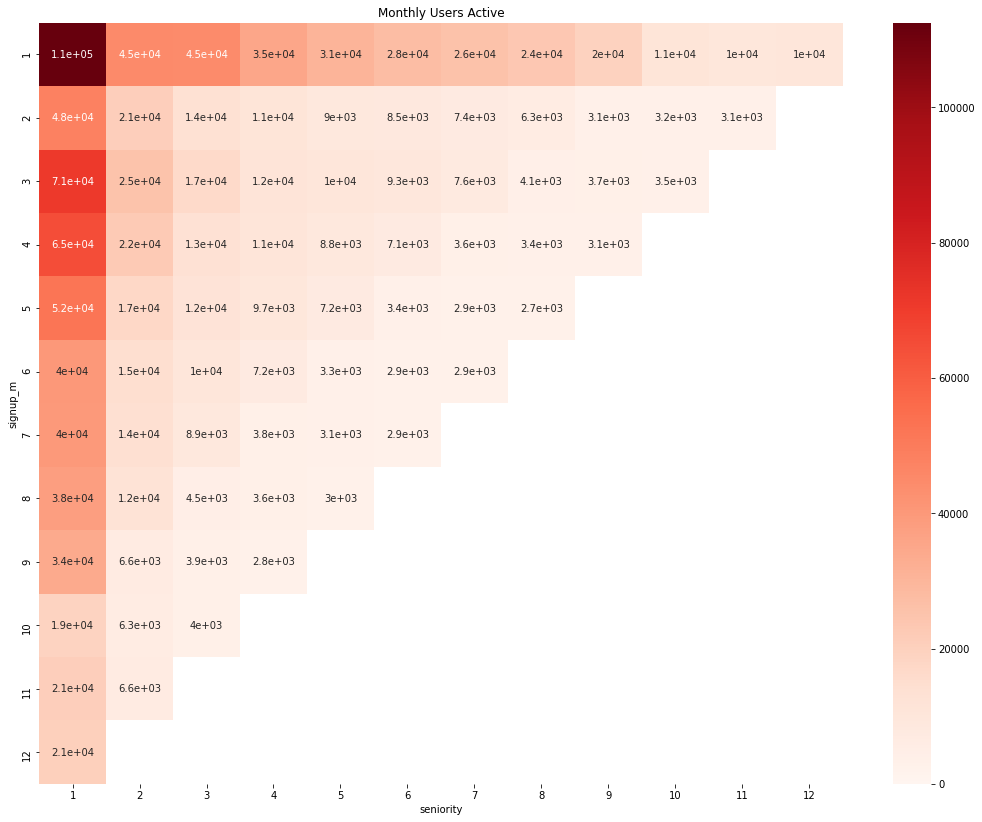

In [75]:
plt.figure(figsize=(18,14))
plt.title('Monthly Users Active')
ax = sns.heatmap(data=cohort_counts_m, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts_m.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")

plt.show()

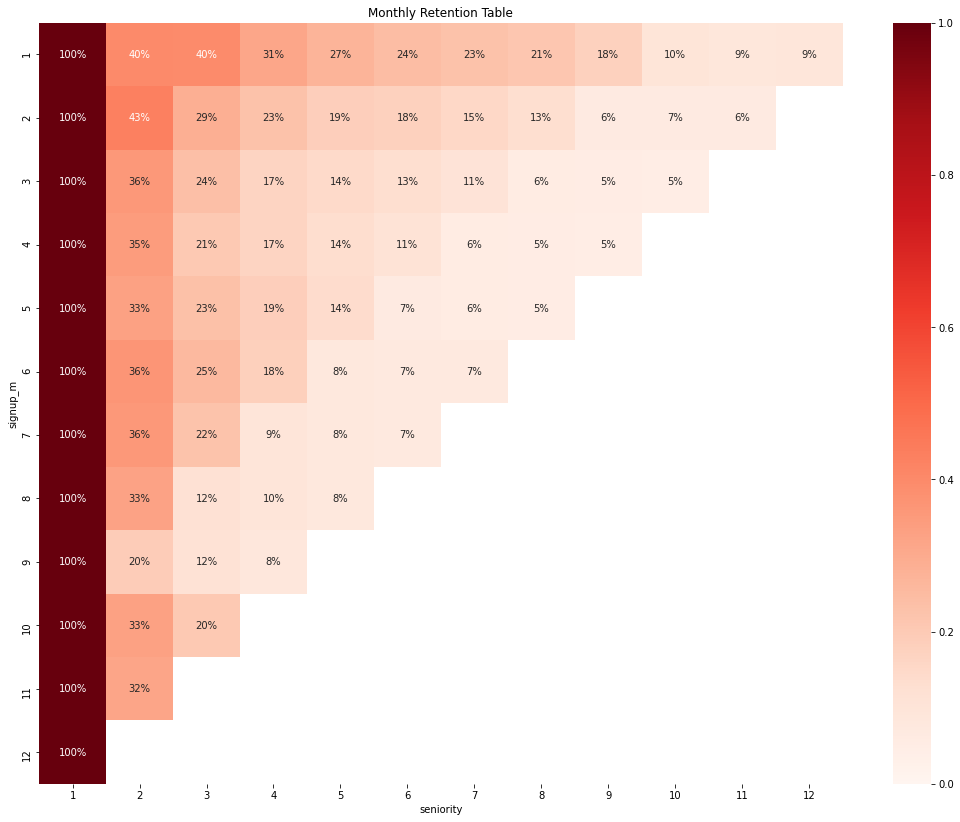

In [62]:

plt.figure(figsize=(18,14))
plt.title('Monthly Retention Table')
ax = sns.heatmap(data=retention_m, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_m.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")

plt.show()

### Monthly Retention per Category

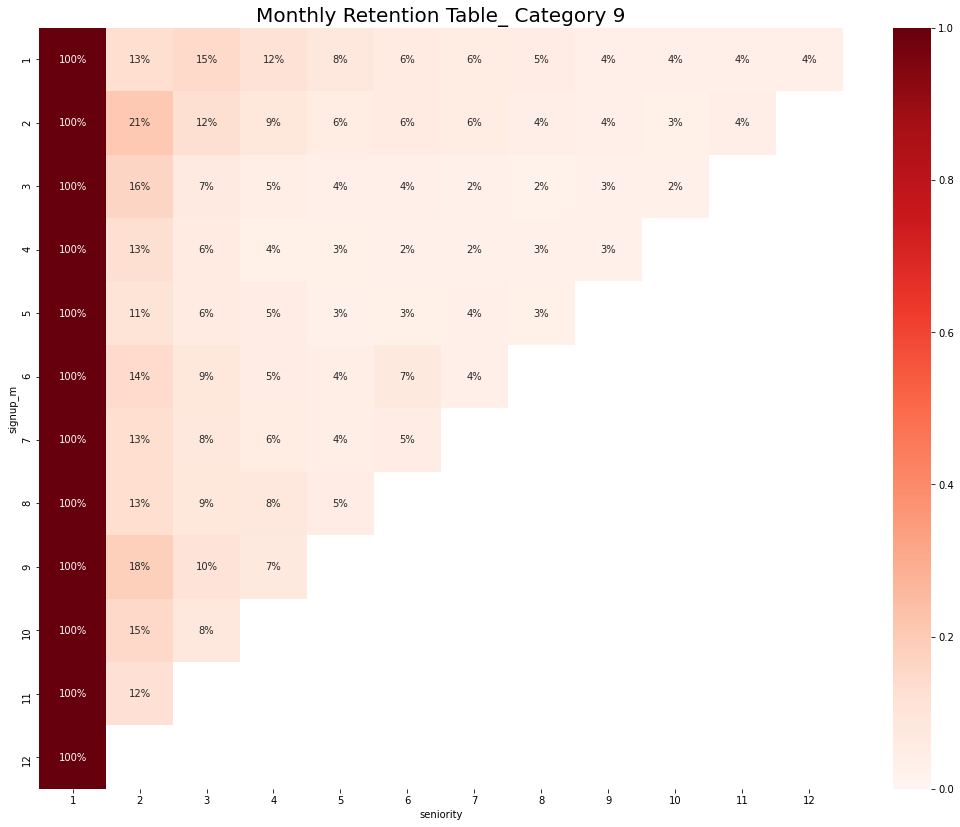

In [78]:
cohort_m_c = df4_m.loc[df4_m['category']=='category9'].groupby(['signup_m', 'seniority'])['user_id'].count()
cohort_data_m_c = cohort_m_c.reset_index()
cohort_m_c = cohort_data_m_c.pivot(index='signup_m', columns='seniority', values='user_id')
base = cohort_m_c[1]
retention_m_c = cohort_m_c.divide(base, axis=0).round(3)

plt.figure(figsize=(18,14))
plt.title('Monthly Retention Table_ Category 9', fontsize=20)
ax = sns.heatmap(data=retention_m_c, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_m_c.index)
fig=ax.get_figure()


## Herfindahl Index

In [79]:
def hhi(series):
    _, cnt = np.unique(series, return_counts=True)
    return np.square(cnt/cnt.sum()).sum()    

new_df = df.groupby(['category']).agg({'user_id': 'count', 'amount': hhi})
print(new_df)

           user_id    amount
category                    
category0    28303  0.106642
category1   634076  0.220738
category2    15764  0.075775
category3   320728  0.127564
category4     5179  0.114593
category5    38696  0.058406
category6   156455  0.164408
category7    26106  0.053038
category8    12599  0.054578
category9    42075  0.045941


In [80]:
y=pd.pivot_table(df,columns='category',index='game_number',values='amount', aggfunc='sum')

In [81]:
y = y.fillna(0)
y.head()

category,category0,category1,category2,category3,category4,category5,category6,category7,category8,category9
game_number,,,,,,,,,,
game0,943856000.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
game1,0.0,3.924245e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
game10,0.0,3.338583e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
game11,0.0,3.971535e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
game12,0.0,0.000000e+00,0.0,0.0,0.0,0.0,528729200.0,0.0,0.0,0.0


In [82]:
y_prc=y.apply(lambda x: x *100/ x.sum())
y_prc=y_prc.fillna(0)

In [83]:
y_prc.head()

category,category0,category1,category2,category3,category4,category5,category6,category7,category8,category9
game_number,,,,,,,,,,
game0,14.447821,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
game1,0.000000,1.728187,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
game10,0.000000,14.702686,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
game11,0.000000,1.749012,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
game12,0.000000,0.000000,0.0,0.0,0.0,0.0,3.506721,0.0,0.0,0.0


In [84]:
y_prc.sum()

category
category0    100.0
category1    100.0
category2    100.0
category3    100.0
category4    100.0
category5    100.0
category6    100.0
category7    100.0
category8    100.0
category9    100.0
dtype: float64

In [86]:
HHI=np.square(y_prc)
HHI.sum().sort_values(ascending=False)

category
category6    5225.886712
category7    4251.440862
category1    3825.840141
category5    3454.220761
category0    2816.479857
category8    2799.838184
category3    2586.872889
category2    1866.519343
category9    1837.502680
category4    1500.294127
dtype: float64

## Game Share in Category

In [87]:
cat_1=df.loc[df['category']=='category1']

In [88]:
games_cat1=cat_1.groupby('game_number')['amount'].sum()
cat1_sum=games_cat1.sum()
games_cat1_prct=games_cat1.apply(lambda x: 100*x/cat1_sum)
games_cat1_prct.sort_values(ascending=False)

game_number
game85    58.782988
game10    14.702686
game80    10.612292
game71     4.021115
game6      3.179867
game3      1.936568
game36     1.899363
game11     1.749012
game1      1.728187
game43     1.387922
Name: amount, dtype: float64

<Figure size 1440x960 with 0 Axes>

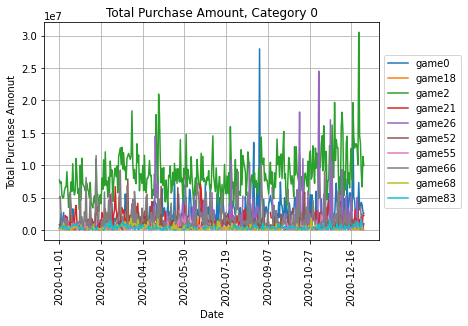

In [206]:
series_cat_1=pd.pivot_table(cat_1, values='amount', columns='game_number', index='date', aggfunc='sum')
plt.figure(figsize=(18, 12), dpi=80)
series_cat_1.plot()
plt.title('Total Purchase Amount, Category 0')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Total Purchase Amonut')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


game_number
game19    47.302659
game51    19.688360
game90     7.422223
game16     7.204599
game25     5.220553
game50     4.405975
game60     3.264342
game75     2.109153
game40     1.990074
game94     1.392062
Name: amount, dtype: float64


<Figure size 1440x960 with 0 Axes>

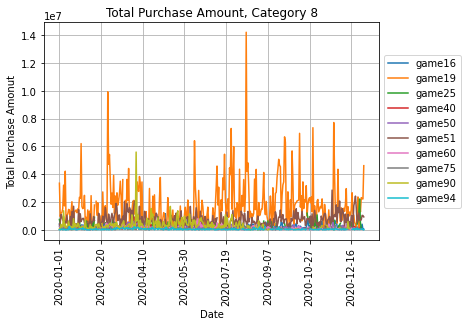

<Figure size 1440x960 with 0 Axes>

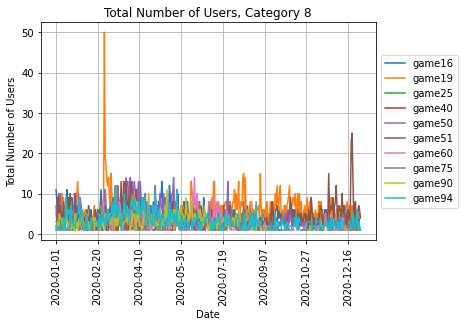

In [223]:
cat=df.loc[df['category']=='category8']
#games_cat=cat.groupby('game_number').aggregate({'amount':'sum','user_id': 'nunique'})
games_cat=cat.groupby('game_number')['amount'].sum()
cat_sum=games_cat.sum()
games_cat_prct=games_cat.apply(lambda x: 100*x/cat_sum)
print(games_cat_prct.sort_values(ascending=False))

series_cat=pd.pivot_table(cat, values='amount', columns='game_number', index='date', aggfunc='sum')
plt.figure(figsize=(18, 12), dpi=80)
series_cat.plot()
plt.title('Total Purchase Amount, Category 8')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Total Purchase Amonut')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

series2_cat=pd.pivot_table(cat, values='user_id', columns='game_number', index='date', aggfunc='nunique')
plt.figure(figsize=(18, 12), dpi=80)
series2_cat.plot()
plt.title('Total Number of Users, Category 8')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Total Number of Users')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## User Segmentation RFM

In [91]:
df_s=df.copy()

In [92]:
df_s['date'] = pd.to_datetime(df.date, format='%Y/%m/%d')

In [93]:
df_s.date.max()

Timestamp('2020-12-31 00:00:00')

In [94]:
recency=df_s.date.max()-df_s.groupby('user_id')['date'].max()
recency=recency.dt.days

In [95]:
frequency=df_s.groupby('user_id')['date'].count()

In [96]:
monetary=df_s.groupby('user_id')['amount'].sum()

In [97]:
dfs=[recency,frequency,monetary]

In [98]:
from functools import reduce
RFM = reduce(lambda left,right: pd.merge(left,right,on='user_id'), dfs)

In [99]:
RFM=RFM.rename(columns={'date_x':'Recency','date_y':'Frequency','amount':'Monetary Value'})

In [100]:
RFM.head()

,Recency,Frequency,Monetary Value
user_id,,,
0,318,2,98000
1,345,2,144000
2,226,3,147000
3,355,1,49000
4,360,2,98000


In [101]:
RFM.dtypes

Recency           int64
Frequency         int64
Monetary Value    int64
dtype: object

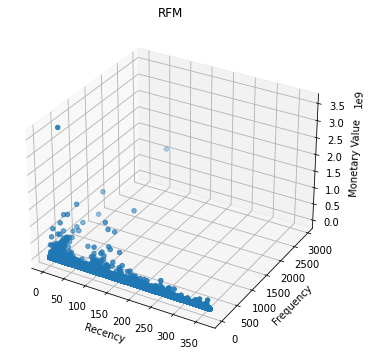

In [104]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(RFM.Recency, RFM.Frequency, RFM['Monetary Value'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('RFM')

plt.show()

Text(0.5, 1.0, 'Recency')

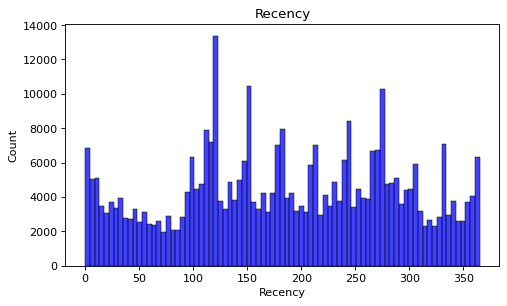

In [111]:
plt.figure(figsize=(7,4), dpi=80)
sns.histplot(RFM.Recency, color='b')
plt.title('Recency')

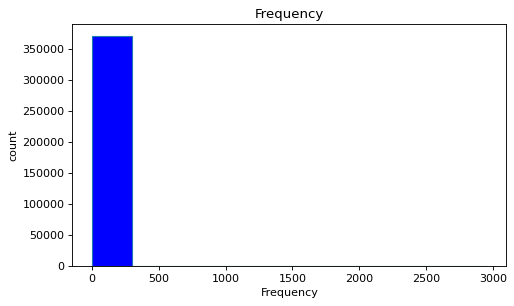

In [125]:
plt.figure(figsize=(7,4), dpi=80)
plt.hist(RFM['Frequency'],bins=10,histtype='step',fill=True, facecolor='b')
plt.title('Frequency')
plt.ylabel('count')
plt.xlabel('Frequency')
plt.show()

In [117]:
RFM.describe()

,Recency,Frequency,Monetary Value
count,371091.000000,371091.000000,3.710910e+05
mean,186.061901,3.449238,8.005828e+05
std,100.140145,11.266207,8.813302e+06
min,0.000000,1.000000,0.000000e+00
25%,112.000000,1.000000,6.800000e+04
50%,183.000000,1.000000,2.994000e+05
75%,271.000000,3.000000,5.988000e+05
max,365.000000,2953.000000,3.525160e+09


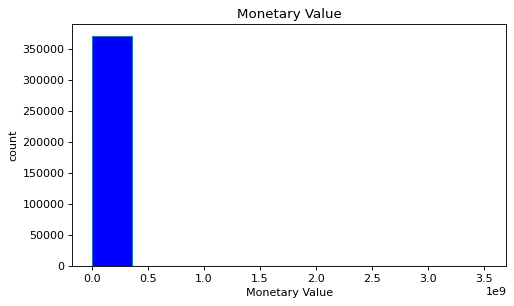

In [127]:
plt.figure(figsize=(7,4), dpi=80)
plt.hist(RFM['Monetary Value'],bins=10,histtype='step',fill=True, facecolor='b')
plt.title('Monetary Value')
plt.ylabel('count')
plt.xlabel('Monetary Value')
plt.show()

In [63]:
plt.figure(figsize=(5,8), dpi=80)
sns.displot(RFM['Monetary Value'], kde=False, rug=True)


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000020750BFDC10> (for post_execute):


KeyboardInterrupt: 

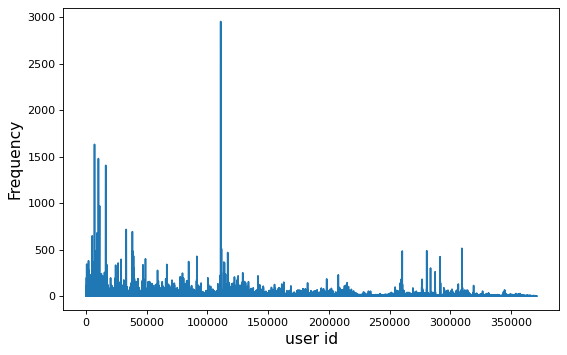

In [128]:
plt.figure(figsize=(8,5), dpi=80)
RFM.Frequency.plot()
plt.xlabel('user id',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

plt.show()

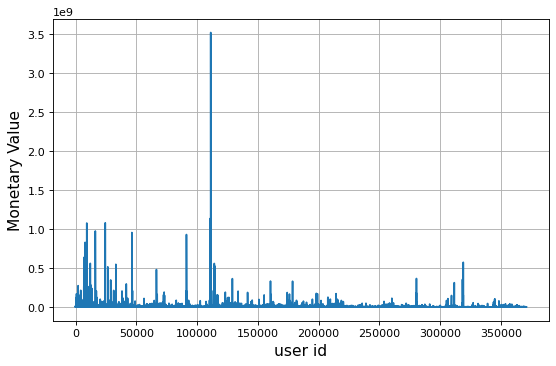

In [129]:
plt.figure(figsize=(8, 5), dpi=80)
RFM['Monetary Value'].plot()
plt.xlabel('user id',fontsize=14)
plt.ylabel('Monetary Value',fontsize=14)
plt.grid()
plt.show()

In [132]:
RFM_n=RFM.copy()
RFM_n['R_rank'] = RFM['Recency'].rank(ascending=False)
RFM_n['F_rank'] = RFM['Frequency'].rank(ascending=True)
RFM_n['M_rank'] = RFM['Monetary Value'].rank(ascending=True)

RFM_n['R_rank_norm'] = ((RFM_n['R_rank']-RFM_n['R_rank'].min())/RFM_n['R_rank'].max())
RFM_n['F_rank_norm'] = ((RFM_n['F_rank']-RFM_n['F_rank'].min())/RFM_n['F_rank'].max())
RFM_n['M_rank_norm'] = ((RFM_n['M_rank']-RFM_n['M_rank'].min())/RFM_n['M_rank'].max())

RFM_n.drop(columns=['R_rank', 'F_rank', 'M_rank', 'Recency', 'Frequency', 'Monetary Value'], inplace=True)

RFM_n.head()


,R_rank_norm,F_rank_norm,M_rank_norm
user_id,,,
0,0.105433,0.347723,0.294447
1,0.045981,0.347723,0.370808
2,0.386935,0.482997,0.373577
3,0.028700,0.000000,0.152220
4,0.015929,0.347723,0.294447


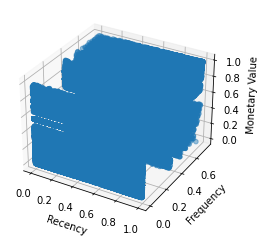

In [133]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(RFM_n.R_rank_norm, RFM_n.F_rank_norm, RFM_n.M_rank_norm)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

plt.show()

In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(RFM)
RFM_s=scaler.transform(RFM)
RFM_s

array([[ 1.3175363 , -0.12863596, -0.07971856],
       [ 1.5871588 , -0.12863596, -0.07449917],
       [ 0.39882259, -0.03987483, -0.07415878],
       ...,
       [-0.86940176, -0.2173971 , -0.02282721],
       [-0.86940176, -0.2173971 , -0.02282721],
       [-0.86940176, -0.2173971 , -0.02282721]])

In [135]:
from sklearn.cluster import KMeans

In [165]:
X=RFM_n.values

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, max_iter=300)
k_means.fit(X)
labels = k_means.labels_

In [166]:
RFM["Clus_km"] = labels
RFM.head(5)

,Recency,Frequency,Monetary Value,Clus_km
user_id,,,,
0,318,2,98000,0
1,345,2,144000,0
2,226,3,147000,0
3,355,1,49000,0
4,360,2,98000,0


In [171]:
RFM.groupby('Clus_km').mean()

,Recency,Frequency,Monetary Value,R
Clus_km,,,,
0,282.144813,1.335751,1.743422e+05,1.035642
1,102.783439,1.313381,1.611034e+05,2.428968
2,145.532975,7.528259,2.014536e+06,2.001275


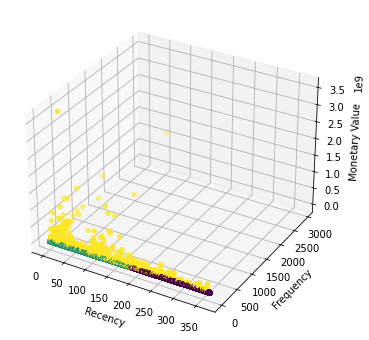

<Figure size 432x288 with 0 Axes>

In [172]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(projection='3d')

plt.cla()
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
fig = plt.figure()

ax.scatter(RFM['Recency'], RFM['Frequency'], RFM['Monetary Value'], c= labels.astype(float))

In [169]:
RFM.groupby('Clus_km').agg({
    'Recency':['min','mean','median','max'],
    'Frequency':['min','mean','median','max'],
    'Monetary Value':['min','mean','median','max','count']}).round(2)

Recency                     Frequency                     \
            min    mean median  max       min  mean median   max   
Clus_km                                                            
0           190  282.14    279  365         1  1.34      1    32   
1             0  102.78    112  191         1  1.31      1   262   
2             0  145.53    143  365         1  7.53      4  2953   

        Monetary Value                                          
                   min        mean  median         max   count  
Clus_km                                                         
0                    0   174342.18  100000    13498650  142025  
1                    0   161103.44  100000     2698650  102045  
2                50000  2014535.71  808200  3525160000  127021

In [224]:
pd.pivot_table(df_RFM, columns='Clus_km', index='category', values='user_id', aggfunc='nunique')

Clus_km,0,1,2
category,,,
category0,2841,2843,3955
category1,57371,34294,82262
category2,4672,3020,1832
category3,34101,26300,27132
category4,2128,2645,142
category5,5954,4250,5482
category6,21473,16079,13405
category7,2405,3242,3646
category8,3547,2367,1598


In [170]:
def recency_score(x):
    if x['Recency'] <=100:
        recency=3
    elif x['Recency'] >100 and x['Recency']<=200:
        recency=2
    else:
        recency=1
    return recency

RFM['R']=RFM.apply(recency_score,axis=1)
        

In [179]:
def frequency_score(x):
    if x['Frequency'] <=10:
        frequency=1
    elif x['Frequency'] >10 and x['Frequency']<=100:
        frequency=2
    else:
        frequency=3
    return frequency

RFM['F']=RFM.apply(frequency_score,axis=1)

In [180]:
pd.qcut(RFM['Monetary Value'], q=3).head()

user_id
0      (-0.001, 105000.0]
1    (105000.0, 348400.0]
2    (105000.0, 348400.0]
3      (-0.001, 105000.0]
4      (-0.001, 105000.0]
Name: Monetary Value, dtype: category
Categories (3, interval[float64]): [(-0.001, 105000.0] < (105000.0, 348400.0] < (348400.0, 3525160000.0]]

In [181]:
def monetary_score(x):
    if x['Monetary Value'] <=200000:
        monetary_score=1
    elif x['Monetary Value'] >200000 and x['Monetary Value']<=1000000:
        monetary_score=2
    else:
        monetary_score=3
    return monetary_score

RFM['M']=RFM.apply(monetary_score,axis=1)

In [182]:
RFM.head()

,Recency,Frequency,Monetary Value,Clus_km,R,M,F
user_id,,,,,,,
0,318,2,98000,0,1,1,1
1,345,2,144000,0,1,1,1
2,226,3,147000,0,1,1,1
3,355,1,49000,0,1,1,1
4,360,2,98000,0,1,1,1


In [183]:
df_RFM=pd.merge(df,RFM,on='user_id')
df_RFM.head(5)

,game_number,user_id,amount,date,sku_id,category,month,Recency,Frequency,Monetary Value,Clus_km,R,M,F
0,game0,0,49000,2020-01-11,sku0,category0,1,318,2,98000,0,1,1,1
1,game0,0,49000,2020-02-17,sku0,category0,2,318,2,98000,0,1,1,1
2,game0,1,49000,2020-01-07,sku0,category0,1,345,2,144000,0,1,1,1
3,game0,1,95000,2020-01-21,sku4,category0,1,345,2,144000,0,1,1,1
4,game0,2,49000,2020-01-12,sku0,category0,1,226,3,147000,0,1,1,1


In [184]:
def rfm_score(row):
    return str(row['R'])+str(row['F'])+str(row['M'])
RFM['RFM_score']=RFM.apply(rfm_score, axis=1)
RFM.head()

,Recency,Frequency,Monetary Value,Clus_km,R,M,F,RFM_score
user_id,,,,,,,,
0,318,2,98000,0,1,1,1,111
1,345,2,144000,0,1,1,1,111
2,226,3,147000,0,1,1,1,111
3,355,1,49000,0,1,1,1,111
4,360,2,98000,0,1,1,1,111


In [194]:
df_RFM=pd.merge(df,RFM,on='user_id')
df_RFM.head()

,game_number,user_id,amount,date,sku_id,category,month,Recency,Frequency,Monetary Value,Clus_km,R,M,F,RFM_score
0,game0,0,49000,2020-01-11,sku0,category0,1,318,2,98000,0,1,1,1,111
1,game0,0,49000,2020-02-17,sku0,category0,2,318,2,98000,0,1,1,1,111
2,game0,1,49000,2020-01-07,sku0,category0,1,345,2,144000,0,1,1,1,111
3,game0,1,95000,2020-01-21,sku4,category0,1,345,2,144000,0,1,1,1,111
4,game0,2,49000,2020-01-12,sku0,category0,1,226,3,147000,0,1,1,1,111


In [195]:
big_spenders=df_RFM.loc[df_RFM["M"]==3]

In [196]:
loyal=df_RFM.loc[df_RFM['F']==3]

In [204]:
best_customers=df_RFM.loc[df_RFM['RFM_score']==333]
best_customers.head()

,game_number,user_id,amount,date,sku_id,category,month,Recency,Frequency,Monetary Value,Clus_km,R,M,F,RFM_score


In [199]:
big_spenders.groupby('category')['user_id'].nunique().sort_values(ascending=False)

category
category1    37615
category3     7045
category6     4105
category5     2963
category0     1792
category9     1422
category7     1314
category8      566
category2      468
category4       44
Name: user_id, dtype: int64

In [200]:
loyal.groupby('category')['user_id'].nunique().sort_values(ascending=False)

category
category1    311
category3     68
category6     65
category5     21
category0     15
category7     10
category8      7
category9      4
category2      3
category4      1
Name: user_id, dtype: int64

In [203]:
best_customers.groupby('category')['user_id'].nunique()

Series([], Name: user_id, dtype: int64)